**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

ModuleNotFoundError: No module named 'ExchangeEconomy'

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [ ]:
model = ExchangeEconomyClass()
N=100


In [10]:
# Corrected code based on the provided snippet for the assignment

import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy import optimize
import numpy as np

# Update matplotlib settings for grid and font size
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--"
})
plt.rcParams.update({'font.size': 14})


# Example of using the model class and plotting the Edgeworth box
model = ExchangeEconomyClass()

# Setup for Edgeworth box plot
par = model.par

# Grid seacrh

# Define the grid
N = 75  # Number of points in each dimension
x1A_grid = np.linspace(0, par.w1A + par.w1B, N)
x2A_grid = np.linspace(0, par.w2A + par.w2B, N)

# Prepare for Pareto improvement search
pareto_improvements = []

# Initial utilities with endowments
initial_utility_A = model.utility_A(par.w1A, par.w2A)
initial_utility_B = model.utility_B(par.w1B, par.w2B)

# Grid search for Pareto improvements
for x1A in x1A_grid:
    for x2A in x2A_grid:
        # Calculate remaining goods for B
        x1B = par.w1A + par.w1B - x1A
        x2B = par.w2A + par.w2B - x2A
        
        # Ensure allocations are non-negative
        if x1B >= 0 and x2B >= 0:
            utility_A = model.utility_A(x1A, x2A)
            utility_B = model.utility_B(x1B, x2B)
            
            # Check for Pareto improvement
            if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
                pareto_improvements.append((x1A, x2A))

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment for A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')

# Plot limits
w1bar = 1.0
w2bar = 1.0

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Adding Pareto improvements scatter plot
ax_A.scatter(np.array(pareto_improvements)[:, 0], np.array(pareto_improvements)[:, 1], color='blue', label='Pareto Improvements')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()



NameError: name 'ExchangeEconomyClass' is not defined

In [ ]:
import pandas as pd


N = 75
increments = np.array(range(N)) / N
p1_prices = 0.5 + 2*increments
# Initialize lists to store the values of eps1 and eps2
eps1_values = []
eps2_values = []

# Calculate eps1 and eps2 for each price in p1_prices
for p1 in p1_prices:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

df = pd.DataFrame({
    'p1': p1_prices,
    'eps1': eps1_values,
    'eps2': eps2_values
})

# Print the DataFrame
print(df)

          p1      eps1      eps2
0   0.500000  0.566667 -0.566667
1   0.526667  0.509283 -0.509283
2   0.553333  0.457430 -0.457430
3   0.580000  0.410345 -0.410345
4   0.606667  0.367399 -0.367399
..       ...       ...       ...
70  2.366667 -0.327230  0.327230
71  2.393333 -0.329898  0.329898
72  2.420000 -0.332507  0.332507
73  2.446667 -0.335059  0.335059
74  2.473333 -0.337556  0.337556

[75 rows x 3 columns]


In [ ]:
#Spørgsmål 3
import pandas as pd
import numpy as np

# Your final code structure for calculating eps1 and eps2
N = 75
increments = np.array(range(N)) / N
p1_prices = 0.5 + 2*increments
eps1_values = []
eps2_values = []

# Assuming 'model' is an instance of your ExchangeEconomyClass with the correct check_market_clearing method
for p1 in p1_prices:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

df = pd.DataFrame({
    'p1': p1_prices,
    'eps1': eps1_values,
    'eps2': eps2_values
})

# New addition: Finding the market-clearing price
df['abs_sum_eps'] = abs(df['eps1']) + abs(df['eps2'])
min_eps_row = df.loc[df['abs_sum_eps'].idxmin()]
market_clearing_price = min_eps_row['p1']
print(f"The market-clearing price is approximately: {market_clearing_price}")


The market-clearing price is approximately: 1.0066666666666668


In [1]:
# Correcting the approach and defining utility function for consumer B as needed
def utility_B(x1, x2, beta=1/3):
    return (x1**beta) * (x2**(1-beta))

# Assuming alpha and beta values are given as 2/3 and 1/3 respectively
alpha, beta = 2/3, 1/3

# Re-calculating initial utilities with correct definitions
initial_utility_A = utility_A(omega_1A, omega_2A, alpha)
initial_utility_B = utility_B(omega_B1, omega_B2, beta)

# Constraint for optimization problem ensuring B's utility is at least as high as initial
def constraint_B_opt(x):
    return utility_B(1 - x[0], 1 - x[1], beta) - initial_utility_B

# Adjusting constraints for optimization
constraints_opt = [{'type': 'ineq', 'fun': constraint_B_opt}]

# Solving the optimization problem with corrections
result_corrected = minimize(objective_A, initial_guess, bounds=bounds, constraints=constraints_opt)

result_corrected.x, -result_corrected.fun


NameError: name 'utility_A' is not defined

NameError: name 'par' is not defined

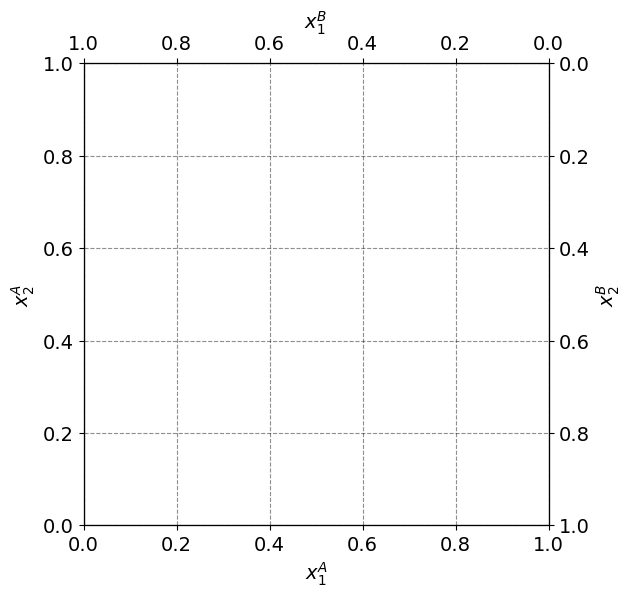

In [11]:
from scipy.optimize import minimize
# Objective function to maximize the aggregate utility
def aggregate_utility(x):
    utility_A = (x[0]**alpha) * (x[1]**(1-alpha))
    utility_B = ((1-x[0])**beta) * ((1-x[1])**(1-beta))
    return -(utility_A + utility_B)  # Negative for maximization

# Alpha and Beta values are given from the document: α = 2/3, β = 1/3

alpha, beta = 2/3, 1/3  # Given alpha and beta values
bounds = ((0, 1), (0, 1))  # Bounds for xA1 and xA2
initial_guess = [0.5, 0.5]  # Initial guess
    

# Solve the optimization problem
result_aggregate = minimize(aggregate_utility, initial_guess, bounds=bounds)

result_aggregate.x, -result_aggregate.fun

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment for A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')

# Plot limits
w1bar = 1.0
w2bar = 1.0

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Adding Pareto improvements scatter plot
ax_A.scatter(np.array(pareto_improvements)[:, 0], np.array(pareto_improvements)[:, 1], color='blue', label='Pareto Improvements')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()


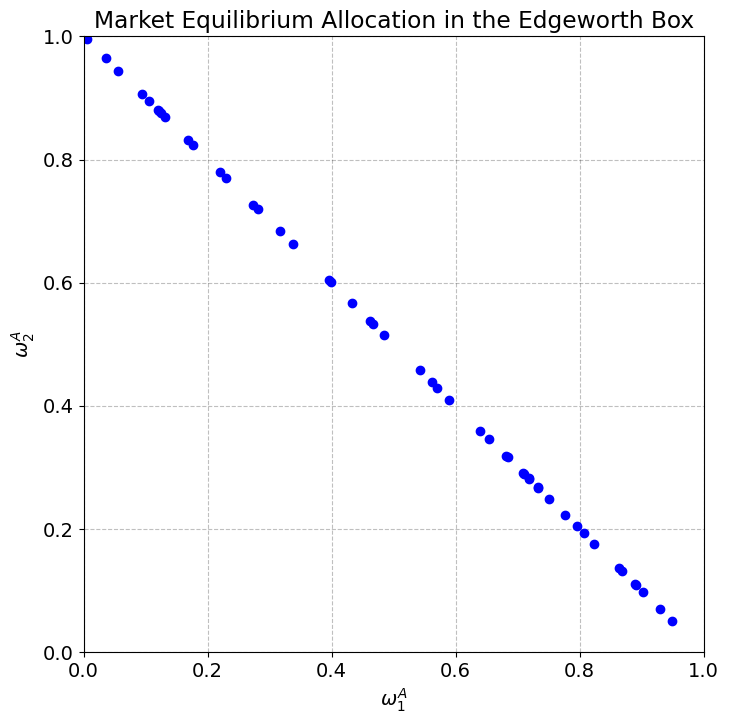

In [54]:
#Spørgsmål 8 
import numpy as np
import matplotlib.pyplot as plt

# Define the number of elements
num_elements = 50
# Generate a random set W with 50 elements where both omega_A1 and omega_A2 are drawn from a uniform distribution U(0,1)
omega_A1 = np.random.uniform(0, 1, num_elements)
omega_A2 = np.random.uniform(0, 1, num_elements)

# Create the set W as a collection of tuples (omega_A1, omega_A2)
W = list(zip(omega_A1, omega_A2))

# Assuming market equilibrium occurs when omega_A1 + omega_A2 = 1 for both goods
# This is just a placeholder; the actual market equilibrium would depend on the specific utility functions and other conditions
market_equilibrium = [(omega[0], 1 - omega[0]) for omega in W]

# Plot in the Edgeworth box
plt.figure(figsize=(8, 8))
for point in market_equilibrium:
    plt.plot(point[0], point[1], 'o', color='blue')
plt.title('Market Equilibrium Allocation in the Edgeworth Box')
plt.xlabel('$\omega^A_1$')
plt.ylabel('$\omega^A_2$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()
